Q1

In [4]:
types = [ComplexF64, Complex{AbstractFloat}, Complex{<:AbstractFloat}, AbstractFloat, Union{Float64, ComplexF64}, Int32, Matrix{Float32}, Base.RefValue]

8-element Vector{Type}:
 ComplexF64 (alias for Complex{Float64})
 Complex{AbstractFloat}
 Complex{<:AbstractFloat}
 AbstractFloat
 Union{Float64, ComplexF64}
 Int32
 Matrix{Float32} (alias for Array{Float32, 2})
 Base.RefValue

In [16]:
func = [Base.isconcretetype, Base.isprimitivetype, Base.isabstracttype, Base.isbitstype, Base.ismutabletype]

5-element Vector{Function}:
 isconcretetype (generic function with 1 method)
 isprimitivetype (generic function with 1 method)
 isabstracttype (generic function with 1 method)
 isbitstype (generic function with 1 method)
 ismutabletype (generic function with 1 method)

In [17]:
for t in types
    for f in func
        print(f(t))
        print(' | ')
    end
    print('\n')
end

true false false true false 
true false false false false 
false false false false false 
false false true false false 
false false false false false 
true true false true false 
true false false false true 
false false false false true 


|type of  |is concrete|is primitive	|is abstract	|is bits type	|is mutable|
|    :----:   |    :----:   |    :----:   |    :----:   |    :----:   | :----:   |
|ComplexF64| true | false | false | true | false | 
|Complex{AbstractFloat}| true | false | false | false | false | 
|Complex{<:AbstractFloat}| false | false | false | false | false | 
|AbstractFloat| false | false | true | false | false | 
|Union{Float64, ComplexF64}| false | false | false | false | false | 
|Int32| true | true | false | true | false | 
|Matrix{Float32}| true | false | false | false | true | 
|Base.RefValue| false | false | false | false | true | 


Q2

In [1]:
using Distributions, LinearAlgebra, Random


DiagNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 0.0; 0.0 1.0]
)


In [2]:
function random_walk(STEP::Int)
    #initialize the problem
    d = MvNormal(zeros(2), Diagonal(ones(2)))
    dx = rand(d, STEP)
    x = Array{Float64, 2}(undef, 2, STEP + 1)
    x[1, 1] = 0
    x[2, 1] = 0

    #random walk
    for step = 1 : STEP
        for j in 1:2
            x[j, step + 1] = x[j, step] + dx[j, step]
        end
    end
    return x
end

random_walk (generic function with 1 method)

In [3]:
STEP = 10000
x = random_walk(STEP)

2×10001 Matrix{Float64}:
 0.0   0.236577  0.291013  1.02496  …    40.1651    40.3047    40.8838
 0.0  -0.157604  1.00228   1.6129      -178.538   -179.111   -179.524

In [4]:
using BenchmarkTools

In [5]:
@benchmark random_walk(STEP)
# wow that is really fast...

BenchmarkTools.Trial: 1193 samples with 1 evaluation.
 Range (min … max):  3.725 ms …   6.491 ms  ┊ GC (min … max): 0.00% … 23.87%
 Time  (median):     4.101 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   4.181 ms ± 339.179 μs  ┊ GC (mean ± σ):  1.11% ±  4.37%

       ▁▂▆█▆▇▆▃▂▂▁                                             
  ▂▂▃▃▄███████████▇▆▆▃▄▃▃▃▃▃▃▂▂▂▂▂▁▂▁▂▁▂▂▁▁▁▂▂▂▁▂▂▁▂▂▂▂▃▂▂▂▃▂ ▃
  3.72 ms         Histogram: frequency by time        5.71 ms <

 Memory estimate: 1.51 MiB, allocs estimate: 78983.

In [7]:
using Plots

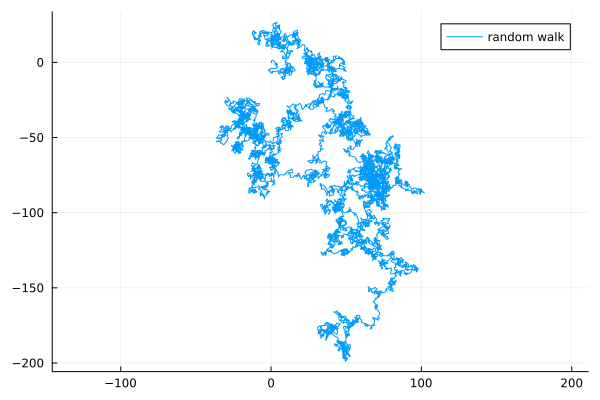

In [17]:
x_max = maximum(x[1,:])
x_min = minimum(x[1,:])

y_max = maximum(x[2,:])
y_min = minimum(x[2,:])

max_xy = max(x_max, y_max)
min_xy = min(x_min, y_min)


plot(x[1,:], x[2, :]; aspect_ratio=:equal,  label = "random walk")